In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from stable_baselines3 import DQN
import matplotlib.pyplot as plt
import gymnasium
import torch
import numpy
import time 

torch.manual_seed(1)
# numpy.random.seed(1)
while True:
    numpy.random.seed(int(time.time()))
    train_env = Monitor(gymnasium.make("CartPole-v1"))
    model = DQN("MlpPolicy", train_env, verbose=0)

    seeds = [1, 2, 3, 5, 8]
    for seed in seeds:
        model.set_random_seed(seed)
        model.learn(total_timesteps=int(2e5))

    eval_env = Monitor(gymnasium.make('CartPole-v1'))
    mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=int(1e3))

    train_rewards = numpy.array(train_env.get_episode_rewards())
    eval_rewards = numpy.array(eval_env.get_episode_rewards())

    figs, axs = plt.subplots(1,2, figsize=(12, 5))
    axs[0].plot(train_rewards)
    axs[0].set_ylim(0, 550)
    axs[0].set_xlabel('Episódios')
    axs[0].set_ylabel('Recompensa')
    axs[0].set_title('Treino')

    axs[1].plot(eval_rewards)
    axs[1].set_ylim(0, 550)
    axs[1].set_title('Validação')
    axs[1].set_xlabel('Episódios')
    axs[1].set_ylabel('Recompensa')
    plt.show()

In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from stable_baselines3 import DQN
import gymnasium
import numpy
import torch

# numpy.random.seed(1)
# torch.manual_seed(1)

train_env = Monitor(gymnasium.make('CartPole-v1'))
train_env.reset(seed=1)

model = DQN("MlpPolicy", train_env)

seeds = [1, 2, 3, 5, 8]
for seed in seeds:
    model.set_random_seed(seed)
    model.learn(total_timesteps=int(2e5))

eval_env = Monitor(gymnasium.make('CartPole-v1'))
eval_env.reset(seed=0)
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=int(1e3))

In [ ]:
from stable_baselines3.common.callbacks import EvalCallback
import gymnasium

class TrialEvalCallback(EvalCallback):
    """Callback used for evaluating and reporting a trial."""

    def __init__(
        self,
        eval_env: gymnasium.Env,
        trial: optuna.Trial,
        n_eval_episodes: int = 5,
        eval_freq: int = 1000,
        deterministic: bool = True,
        verbose: int = 0,
    ):
        super().__init__(
            eval_env=eval_env,
            n_eval_episodes=n_eval_episodes,
            eval_freq=eval_freq,
            deterministic=deterministic,
            verbose=verbose,
        )
        self.trial = trial
        self.eval_idx = 0
        self.is_pruned = False

    def _on_step(self) -> bool:
        if self.eval_freq > 0 and self.n_calls % self.eval_freq == 0:
            super()._on_step()
            self.eval_idx += 1
            self.trial.report(self.last_mean_reward, self.eval_idx)
            # Prune trial if need.
            if self.trial.should_prune():
                self.is_pruned = True
                return False
        return True

In [ ]:
import torch
from optuna.samplers import TPESampler
from optuna.pruners import MedianPruner

N_STARTUP_TRIALS = int(1e1)
N_EVALUATIONS = int(3e1)
N_TRIALS = int(1e3)

#optuna.logging.set_verbosity(optuna.logging.ERROR)
torch.set_num_threads(1)

sampler = TPESampler(n_startup_trials=N_STARTUP_TRIALS, seed= 1)
# Do not prune before 1/3 of the max budget is used.
pruner = MedianPruner(n_startup_trials=N_STARTUP_TRIALS, n_warmup_steps=N_EVALUATIONS // 3)

study = optuna.create_study(sampler=sampler, pruner=pruner, direction="maximize")
study.optimize(objective, n_trials=N_TRIALS, show_progress_bar= True)

[I 2025-06-22 22:22:10,500] A new study created in memory with name: no-name-ccf4a39b-0986-49e6-b391-2f5c0f1b4ebd


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-06-22 22:26:46,815] Trial 0 finished with value: 9.46 and parameters: {'gamma': 0.95, 'learning_rate': 0.0005343227125594117, 'batch_size': 256, 'buffer_size': 10000, 'exploration_final_eps': 0.039620297816975764, 'exploration_fraction': 0.40037228433776834, 'target_update_interval': 1, 'learning_starts': 5000, 'train_freq': 1, 'subsample_steps': 2}. Best is trial 0 with value: 9.46.
[I 2025-06-22 22:31:02,196] Trial 1 finished with value: 9.48 and parameters: {'gamma': 0.99, 'learning_rate': 1.2497835076619116e-05, 'batch_size': 16, 'buffer_size': 50000, 'exploration_final_eps': 0.13888003154554904, 'exploration_fraction': 0.20708963476345132, 'target_update_interval': 15000, 'learning_starts': 0, 'train_freq': 4, 'subsample_steps': 8}. Best is trial 1 with value: 9.48.
[I 2025-06-22 22:35:06,898] Trial 2 finished with value: 9.3 and parameters: {'gamma': 0.95, 'learning_rate': 0.0077973687275726105, 'batch_size': 64, 'buffer_size': 1000000, 'exploration_final_eps': 0.12467202

KeyboardInterrupt: 

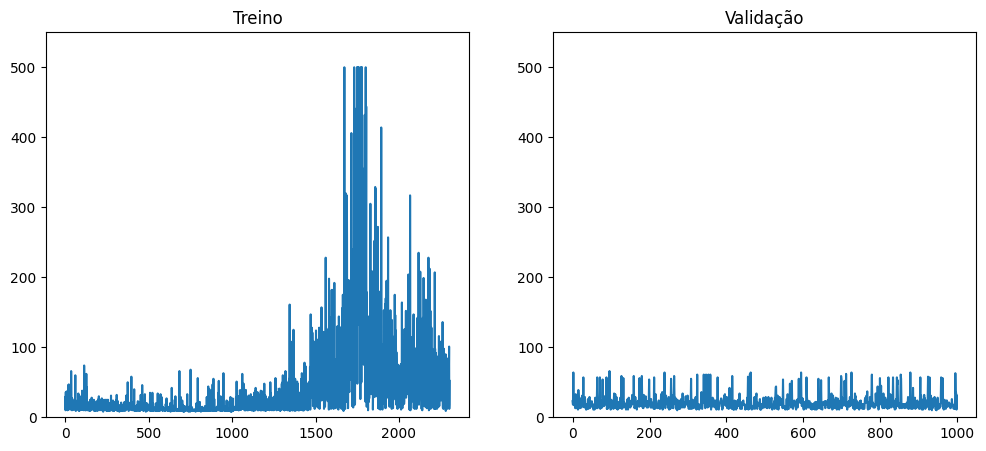

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

train_rewards = np.array(train_env.get_episode_rewards())
eval_rewards = np.array(eval_env.get_episode_rewards())

figs, axs = plt.subplots(1,2, figsize=(12, 5))
axs[0].plot(train_rewards)
axs[0].set_ylim(0, 550)
axs[0].set_title('Treino')

axs[1].plot(eval_rewards)
axs[1].set_ylim(0, 550)
axs[1].set_title('Validação')

plt.show()

In [ ]:
import gymnasium as gym
env = gym.make("LunarLander-v2")
observation, info = env.reset()

for _ in range(1000):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()
env.close()

In [ ]:
import gymnasium as gym
from stable_baselines3 import DQN

env = gym.make("LunarLander-v2")

model = DQN("MlpPolicy", env)
model.learn(total_timesteps = 1000)

In [ ]:
study.best_trial
# [I 2025-06-22 15:04:04,770] Trial 16 finished with value: 500.0 and parameters: . Best is trial 16 with value: 500.0.


FrozenTrial(number=95, state=TrialState.COMPLETE, values=[287.97], datetime_start=datetime.datetime(2025, 6, 23, 9, 11, 48, 152632), datetime_complete=datetime.datetime(2025, 6, 23, 9, 20, 19, 669218), params={'gamma': 0.9999, 'learning_rate': 0.0037138435320511324, 'batch_size': 256, 'buffer_size': 10000, 'exploration_final_eps': 0.08305983003305907, 'exploration_fraction': 0.11071329647524848, 'target_update_interval': 5000, 'learning_starts': 1000, 'train_freq': 8, 'subsample_steps': 1}, user_attrs={}, system_attrs={}, intermediate_values={1: 9.386, 2: 9.346, 3: 9.354, 4: 9.332, 5: 9.349, 6: 9.381, 7: 9.39, 8: 9.352, 9: 9.36, 10: 9.374, 11: 11.014, 12: 10.756, 13: 10.716, 14: 10.2, 15: 9.55, 16: 9.368, 17: 9.323, 18: 9.386, 19: 9.388, 20: 9.331, 21: 9.823, 22: 9.345, 23: 9.35, 24: 9.778, 25: 9.332, 26: 9.979, 27: 9.406, 28: 9.561, 29: 9.794, 30: 9.408, 31: 9.414, 32: 10.409, 33: 9.348, 34: 9.846, 35: 9.371, 36: 9.351, 37: 11.832, 38: 9.349, 39: 10.051, 40: 9.476, 41: 9.762, 42: 9.33

In [ ]:
# Treino do modelo com hiperparâmetros selecionados
from stable_baselines3.common.evaluation import evaluate_policy

np.random.seed(0)
torch.manual_seed(0)
# best_model_params = {
    # 'gamma': 0.99, 
    # 'learning_rate': 0.002, 
    # 'batch_size': 32, 
    # 'buffer_size': 50000, 
    # 'exploration_final_eps': 0.05, 
    # 'exploration_fraction': 0.2, 
    # 'target_update_interval': 1000, 
    # 'learning_starts': 0, 
    # 'train_freq': 32
    # }
best_model_params = sample_dqn_params(study.best_trial)

train_env = Monitor(gymnasium.make(ENV_ID))
best_model = DQN('MlpPolicy', train_env, **best_model_params)
train_env.reset(seed = 0)
seeds = [1, 2, 3, 5, 8]
for seed in seeds:
    best_model.set_random_seed(seed)
    best_model.learn(total_timesteps=int(2e5)*5)

eval_env = Monitor(gymnasium.make(ENV_ID))
eval_env.reset(seed = 0)
_, _ = evaluate_policy(best_model, eval_env, n_eval_episodes=int(1e3), return_episode_rewards = False)

NameError: name 'np' is not defined

In [ ]:
import torch
from stable_baselines3 import DQN
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.evaluation import evaluate_policy

ENV_ID = "CartPole-v1"
DEFAULT_HYPERPARAMS = {
    "policy": "MlpPolicy",
    "env": ENV_ID,
}
N_EVAL_EPISODES = int(1e2)
EVAL_FREQ = int(1e3)
N_TIMESTEPS = int(2e4)

def objective(trial: optuna.Trial) -> float:
    # Sample hyperparameters.
    kwargs = sample_dqn_params(trial)
    # Create the RL model.
    np.random.seed(0)
    torch.manual_seed(0)
    model = DQN(policy='MlpPolicy', env=ENV_ID, **kwargs)
    # Create env used for evaluation.
    train_env = Monitor(gymnasium.make(ENV_ID))
    train_env.reset(seed=0)
    # Create the callback that will periodically evaluate and report the performance.
    eval_callback = TrialEvalCallback(
        train_env, trial, n_eval_episodes=N_EVAL_EPISODES, eval_freq=EVAL_FREQ, deterministic=True
    )

    nan_encountered = False
    try:
        model.set_random_seed(1)
        model.learn(N_TIMESTEPS, callback=eval_callback)
    except AssertionError as e:
        # Sometimes, random hyperparams can generate NaN.
        print(e)
        nan_encountered = True
    finally:
        # Free memory.
        model.env.close()
        train_env.close()

    # Tell the optimizer that the trial failed.
    if nan_encountered:
        return float("nan")

    if eval_callback.is_pruned:
        raise optuna.exceptions.TrialPruned()

    eval_env = Monitor(gymnasium.make(ENV_ID))
    mean, _ = evaluate_policy(model, eval_env, n_eval_episodes= int(1e2), return_episode_rewards= False)
    return mean 



In [ ]:
import optuna
from typing import Union, Dict, Any

def sample_dqn_params(trial: Union[optuna.Trial, optuna.trial.FrozenTrial]) -> Dict[str, Any]:
    """
    Sampler for DQN hyperparams.

    :param trial:
    :return:
    """
    
    gamma = trial.suggest_categorical("gamma", [0.9, 0.95, 0.98, 0.99, 0.995, 0.999, 0.9999])
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1, log=True)
    target_update_interval = trial.suggest_categorical("target_update_interval", np.arange(10,1001,10).tolist())
    train_freq = trial.suggest_categorical("train_freq", [1, 4, 8, 16, 32, 64])
    subsample_steps = trial.suggest_categorical("subsample_steps", [1, 2, 4, 8])
    gradient_steps = max(train_freq // subsample_steps, 1)

    hyperparams = {
        "gamma": gamma,
        "learning_rate": learning_rate,
        "train_freq": train_freq,
        "gradient_steps": gradient_steps,
        "target_update_interval": target_update_interval
    }

    return hyperparams